In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### trapezoid rule for approximating the definite integral

In [2]:
def trapz(func, a, b, n):
    x = np.linspace(a, b, n)
    y = func(x)
    y_left = y[:-1]
    y_right = y[1:]
    dx = (b-a)/n
    res = (dx/2) * np.sum(y_left + y_right)
    return res

In [3]:
func = lambda x: np.exp(-x**2)
trapz(func, 0, 1, 10000)

0.746749449785952

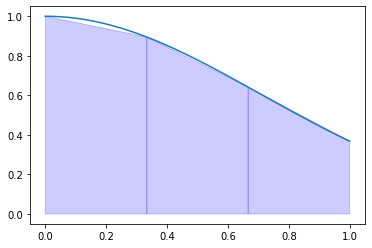

In [4]:
a = 0; b = 1; n = 3

# x and y values for the trapezoid rule
x = np.linspace(a, b, n+1)
y = func(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a, b, 10000)
Y = func(X)
plt.plot(X,Y)

for i in range(n):
    xs = [x[i], x[i], x[i+1], x[i+1]]
    ys = [0, func(x[i]), func(x[i+1]), 0]
    plt.fill(xs, ys, 'b', edgecolor='b', alpha=0.2)

### binary search for square root

In [5]:
def binary_search_sqrt(n):
    l = 0
    r = n
    eps = 0.00001
    sqrt = 0
    while l < r:
        mid = (l+r)/2
        sqrt = mid
        if abs(mid * mid - n) <= eps:
            return sqrt
        elif mid * mid < n:
            l = mid
        else:
            r = mid
    return sqrt

binary_search_sqrt(100)

10.000000149011612

### Newton's method in finding square root

\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\end{equation}

since $x^2=a\Rightarrow x^2-a=0$, let $f(x)=x^2-a$, then $f'(x)=2x$, the iteration formula can be written in:
\begin{equation}
x_{n+1} = x_n - \frac{x_n^2-a}{2x_n}=\frac{1}{2}(x_n + \frac{a}{x_n})
\end{equation}

In [6]:
def newton_sqrt(n):
    eps = 0.00001
    x = n
    while abs(x * x - n) > eps:
        x = (x + n/x) / 2
    return x

newton_sqrt(100)

10.000000000139897

In [7]:
from timeit import timeit

print(timeit(lambda: newton_sqrt(100), number=100000))
print(timeit(lambda: binary_search_sqrt(100), number=100000))

0.2690036989999989
0.9545858350000014
